In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.datasets.samples_generator import make_blobs
from sklearn.mixture import GaussianMixture

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [91]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset

CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]

In [11]:
dataset['Genre'] = dataset['Genre'].replace({"Male":0, "Female":1})

In [21]:
dataset.drop(['Genre','CustomerID'],axis=1,inplace=True)
dataset

Age  Annual Income (k$)  Spending Score (1-100)
0     19                  15                      39
1     21                  15                      81
2     20                  16                       6
3     23                  16                      77
4     31                  17                      40
..   ...                 ...                     ...
195   35                 120                      79
196   45                 126                      28
197   32                 126                      74
198   32                 137                      18
199   30                 137                      83

[200 rows x 3 columns]

In [92]:
X = dataset.iloc[:,2:].values
X

array([[ 19,  15,  39],
       [ 21,  15,  81],
       [ 20,  16,   6],
       [ 23,  16,  77],
       [ 31,  17,  40],
       [ 22,  17,  76],
       [ 35,  18,   6],
       [ 23,  18,  94],
       [ 64,  19,   3],
       [ 30,  19,  72],
       [ 67,  19,  14],
       [ 35,  19,  99],
       [ 58,  20,  15],
       [ 24,  20,  77],
       [ 37,  20,  13],
       [ 22,  20,  79],
       [ 35,  21,  35],
       [ 20,  21,  66],
       [ 52,  23,  29],
       [ 35,  23,  98],
       [ 35,  24,  35],
       [ 25,  24,  73],
       [ 46,  25,   5],
       [ 31,  25,  73],
       [ 54,  28,  14],
       [ 29,  28,  82],
       [ 45,  28,  32],
       [ 35,  28,  61],
       [ 40,  29,  31],
       [ 23,  29,  87],
       [ 60,  30,   4],
       [ 21,  30,  73],
       [ 53,  33,   4],
       [ 18,  33,  92],
       [ 49,  33,  14],
       [ 21,  33,  81],
       [ 42,  34,  17],
       [ 30,  34,  73],
       [ 36,  37,  26],
       [ 20,  37,  75],
       [ 65,  38,  35],
       [ 24,  38

In [50]:
X1 = X.copy()

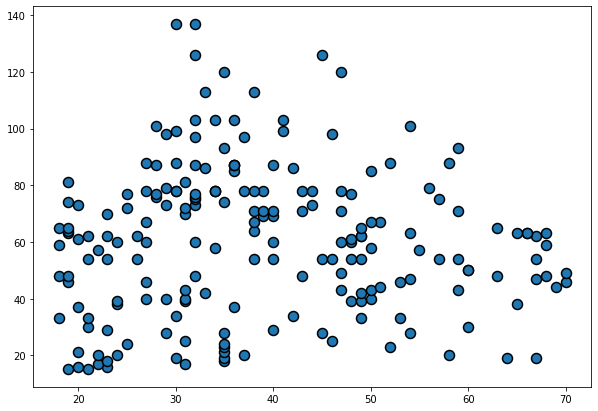

In [27]:
plt.figure(figsize=(10,7))
plt.scatter(X[:,0],X[:,1],edgecolors='black',lw=1.5,s=100,cmap='rainbow')

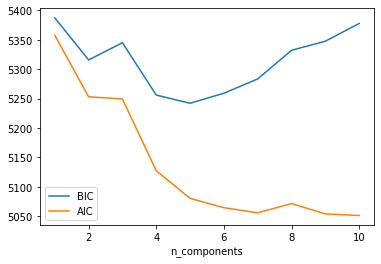

In [93]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X) for n in n_components]
plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [94]:
gmm = GaussianMixture(n_components=5)
gmm.fit(X)

GaussianMixture(n_components=5)

array([1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4,
       1, 3, 4, 1, 1, 1, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

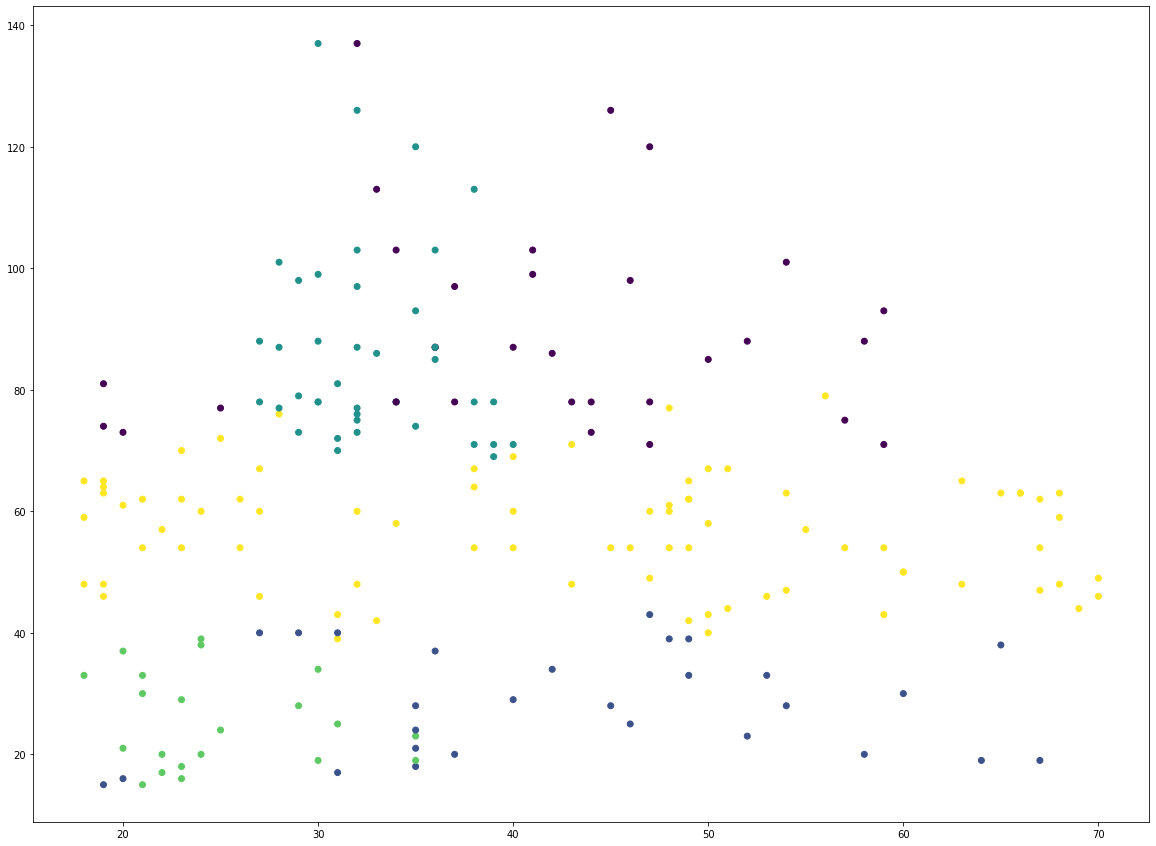

In [100]:
labels = gmm.predict(X)
plt.figure(figsize=(20,15))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis');
labels

In [99]:
dataset['labels'] =  labels
trace1 = go.Scatter3d(
    x= dataset['Age'],
    y= dataset['Spending Score (1-100)'],
    z= dataset['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = dataset['labels'], 
        size= 20,
        line=dict(
            color= dataset['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [101]:
prob = gmm.predict_proba(X)
prob

array([[5.93242450e-10, 9.97816694e-01, 7.77401835e-11, 2.18321675e-03,
        8.87343594e-08],
       [9.41537984e-28, 4.73648809e-06, 2.83736155e-07, 9.99993571e-01,
        1.40909115e-06],
       [3.64887991e-04, 9.99635112e-01, 2.72866015e-19, 8.10525731e-12,
        1.32302617e-22],
       [2.09831128e-25, 1.62994699e-05, 1.55327417e-06, 9.99975456e-01,
        6.69108013e-06],
       [3.03911498e-09, 9.99703824e-01, 8.45392593e-08, 2.94894725e-04,
        1.19366456e-06],
       [8.14550661e-25, 3.69097373e-05, 8.04096507e-07, 9.99950476e-01,
        1.18099269e-05],
       [3.35204919e-04, 9.99664795e-01, 2.01503649e-18, 1.65758663e-15,
        6.53469759e-22],
       [3.93601163e-34, 1.11878061e-07, 1.68262772e-06, 9.99998203e-01,
        2.17298062e-09],
       [7.20011618e-05, 9.99927999e-01, 2.01324083e-37, 2.28137418e-34,
        9.98782073e-23],
       [2.12147618e-21, 2.44827375e-04, 2.31665191e-04, 9.99293075e-01,
        2.30432601e-04],
       [4.08916877e-05, 9.9995

In [102]:
import plotly.express as px

In [108]:
fig = px.scatter_3d(dataset, x= dataset['Age'],y= dataset['Spending Score (1-100)'],z= dataset['Annual Income (k$)'],
              color=dataset['labels'])
fig.show()

In [57]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Initialize KMeans and GaussianMixture models
kmeans = KMeans(n_clusters=4, 
                max_iter=1000,
                tol=1e-4)
gm = GaussianMixture(n_components=4, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')

# Fit and predict the algorithms
y_kmeans = kmeans.fit_predict(X)
y_gm = gm.fit_predict(X)
y_gm_proba = gm.predict_proba(X)

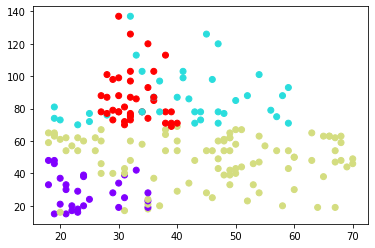

In [58]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow')

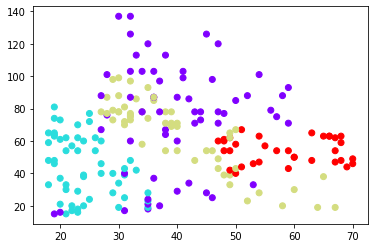

In [59]:
plt.scatter(X[:, 0], X[:, 1], c=y_gm, cmap='rainbow');

In [60]:
gm = GaussianMixture(n_components=4, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')
gm_kmeans = GaussianMixture(n_components=4, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')

y_gm = gm.fit_predict(X1)
y_gm_proba = gm.predict_proba(X1)

y_gm_kmeans = gm_kmeans.fit_predict(X1)
y_gm_proba_kmeans = gm_kmeans.predict_proba(X1)

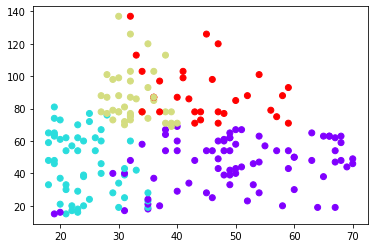

In [61]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_gm, cmap='rainbow')

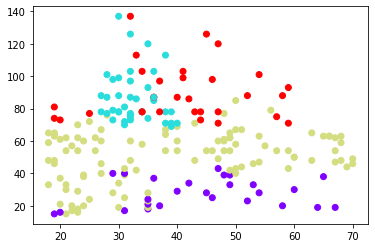

In [62]:
plt.scatter(X1[:, 0], X1[:, 1], c=y_gm_kmeans, cmap='rainbow')

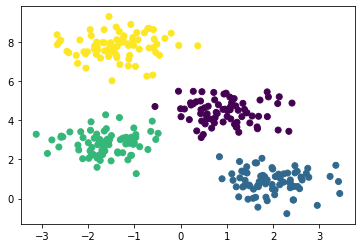

In [66]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1],c=y)

In [64]:
X

array([[ 8.36856841e-01,  2.13635938e+00],
       [-1.41365810e+00,  7.40962324e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [-1.01861632e+00,  7.81491465e+00],
       [ 1.27135141e+00,  1.89254207e+00],
       [ 3.43761754e+00,  2.61654166e-01],
       [-1.80822253e+00,  1.59701749e+00],
       [ 1.41372442e+00,  4.38117707e+00],
       [-2.04932168e-01,  8.43209665e+00],
       [-7.11099611e-01,  8.66043846e+00],
       [-1.71237268e+00,  2.77780226e+00],
       [-2.67000792e+00,  8.35389140e+00],
       [ 1.24258802e+00,  4.50399192e+00],
       [-2.22783649e+00,  6.89479938e+00],
       [ 1.45513831e+00, -2.91989981e-02],
       [ 4.53791789e-01,  3.95647753e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 2.56936589e+00,  5.07048304e-01],
       [-1.06690610e+00,  3.13165795e+00],
       [-1.07859101e+00,  2.20451529e+00],
       [ 2.71506328e+00,  1.29082190e+00],
       [ 1.77710994e+00,  1.18655254e+00],
       [ 7.34363910e-01,  5.03725437e+00],
       [-1.

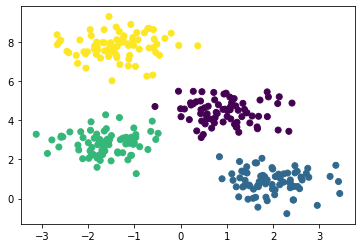

In [75]:
X2, y2 = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X2[:,0], X2[:,1],c=y2)

In [65]:
y

array([1, 3, 0, 3, 1, 1, 2, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 0, 3, 3, 0, 3, 3, 3, 3, 3, 2, 1, 0, 2, 0, 0,
       2, 2, 3, 2, 3, 1, 2, 1, 3, 1, 1, 2, 3, 2, 3, 1, 3, 0, 3, 2, 2, 2,
       3, 1, 3, 2, 0, 2, 3, 2, 2, 3, 2, 0, 1, 3, 1, 0, 1, 1, 3, 0, 1, 0,
       3, 3, 0, 1, 3, 2, 2, 0, 1, 1, 0, 2, 3, 1, 3, 1, 0, 1, 1, 0, 3, 0,
       2, 2, 1, 3, 1, 0, 3, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 1, 3, 2, 2, 3, 0, 3, 3, 2, 0, 2, 0, 2, 3, 0, 3, 3, 3, 0, 3, 0,
       1, 2, 3, 2, 1, 0, 3, 0, 0, 1, 0, 2, 2, 0, 1, 0, 0, 3, 1, 0, 2, 3,
       1, 1, 0, 2, 1, 0, 2, 2, 0, 0, 0, 0, 1, 3, 0, 2, 0, 0, 2, 2, 2, 0,
       2, 3, 0, 2, 1, 2, 0, 3, 2, 3, 0, 3, 0, 2, 0, 0, 3, 2, 2, 1, 1, 0,
       3, 1, 1, 2, 1, 2, 0, 3, 3, 0, 0, 3, 0, 1, 2, 0, 1, 2, 3, 2, 1, 0,
       1, 3, 3, 3, 3, 2, 2, 3, 0, 2, 1, 0, 2, 2, 2, 1, 1, 3, 0, 0, 2, 1,
       3, 2, 0, 3, 0, 1, 1, 2, 2, 0, 1, 1, 1, 0, 3, 3, 1, 1, 0, 1, 1, 1,
       3, 2, 3, 0, 1, 1, 3, 3, 3, 1, 1, 0, 3, 2])

In [72]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Initialize KMeans and GaussianMixture models
kmeans = KMeans(n_clusters=4, 
                max_iter=1000,
                tol=1e-4)
gm = GaussianMixture(n_components=4, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')

# Fit and predict the algorithms
y_kmeans = kmeans.fit_predict(X)
y_gm = gm.fit_predict(X)
y_gm_proba = gm.predict_proba(X)

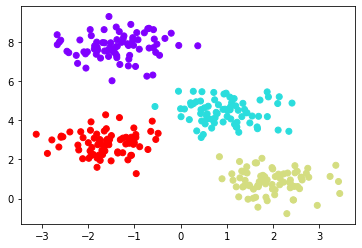

In [73]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='rainbow')

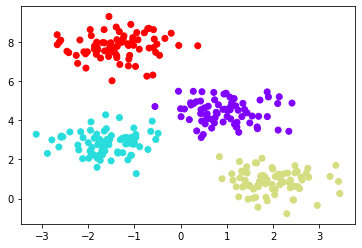

In [74]:
plt.scatter(X[:, 0], X[:, 1], c=y_gm, cmap='rainbow')

In [76]:
gm = GaussianMixture(n_components=4, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')
gm_kmeans = GaussianMixture(n_components=4, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')

y_gm = gm.fit_predict(X2)
y_gm_proba = gm.predict_proba(X2)

y_gm_kmeans = gm_kmeans.fit_predict(X2)
y_gm_proba_kmeans = gm_kmeans.predict_proba(X2)

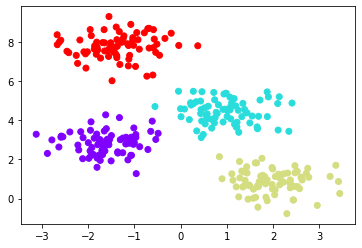

In [77]:
plt.scatter(X2[:, 0], X2[:, 1], c=y_gm, cmap='rainbow')

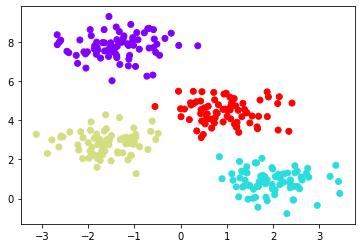

In [79]:
plt.scatter(X2[:, 0], X2[:, 1], c=y_gm_kmeans, cmap='rainbow')

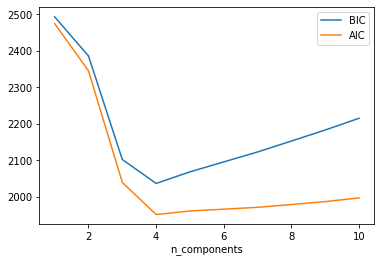

In [80]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X2) for n in n_components]
plt.plot(n_components, [m.bic(X2) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X2) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [83]:
from numpy.random import multivariate_normal
from numpy.random import uniform

In [84]:
def create_dataset(n_samples=3000):
  """ Create dataset with 2 Gaussian distributions and uniform distribution"""
  n_sample = n_samples//3
  data = np.zeros([n_samples, 3])

  data_0 = multivariate_normal(mean=[-1, 1], cov=[[2, 1],[1, 2]], size=(n_sample))
  data_1 = multivariate_normal(mean=[1, 5], cov=[[3, 1],[2, 1]], size=(n_sample))
  data_2 = uniform([5, -3], [10, 5], size=(n_sample, 2))

  # Merged all datapoints into one dataset
  data[:n_sample, :2] = data_0
  data[:n_sample, 2] = np.asarray([0]*n_sample)
  data[n_sample:2*n_sample, :2] = data_1
  data[n_sample:2*n_sample, 2] = np.asarray([1]*n_sample)
  data[2*n_sample:, :2] = data_2
  data[2*n_sample:, 2] = np.asarray([2]*n_sample)

  return data


def plot_dataset(data):
  """ Plots the generated dataset"""
  data_0 = data[data[:, 2] == 0][:, :2]
  data_1 = data[data[:, 2] == 1][:, :2]
  data_2 = data[data[:, 2] == 2][:, :2]

  plt.scatter(data_0[:, 0], data_0[:, 1], c='r', label="Cluster 1")
  plt.scatter(data_1[:, 0], data_1[:, 1], c='b', label="Cluster 2")
  plt.scatter(data_2[:, 0], data_2[:, 1], c='g', label="Cluster 3")
  plt.legend()
  plt.title("2 ovelapping Gaussian distributions and one uniform distribution")
  plt.show()
  plt.clf()

C:\Users\Abhinay.Verma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: covariance is not positive-semidefinite.
  import sys


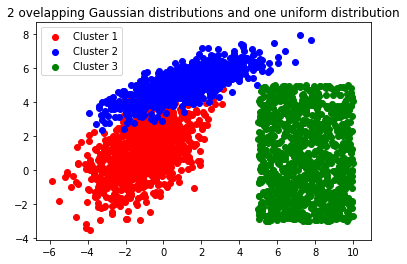

<Figure size 432x288 with 0 Axes>

In [85]:
data = create_dataset()
plot_dataset(data)

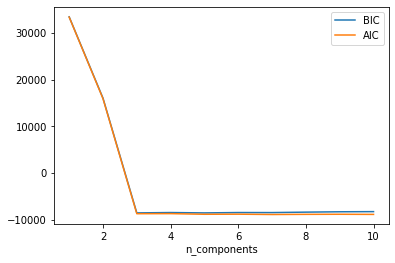

In [86]:
n_components = np.arange(1, 11)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data) for n in n_components]
plt.plot(n_components, [m.bic(data) for m in models], label='BIC')
plt.plot(n_components, [m.aic(data) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

In [87]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# Initialize KMeans and GaussianMixture models
kmeans = KMeans(n_clusters=3, 
                max_iter=1000,
                tol=1e-4)
gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')

# Fit and predict the algorithms
y_kmeans = kmeans.fit_predict(data[:, :2])
y_gm = gm.fit_predict(data[:, :2])
y_gm_proba = gm.predict_proba(data[:, :2])

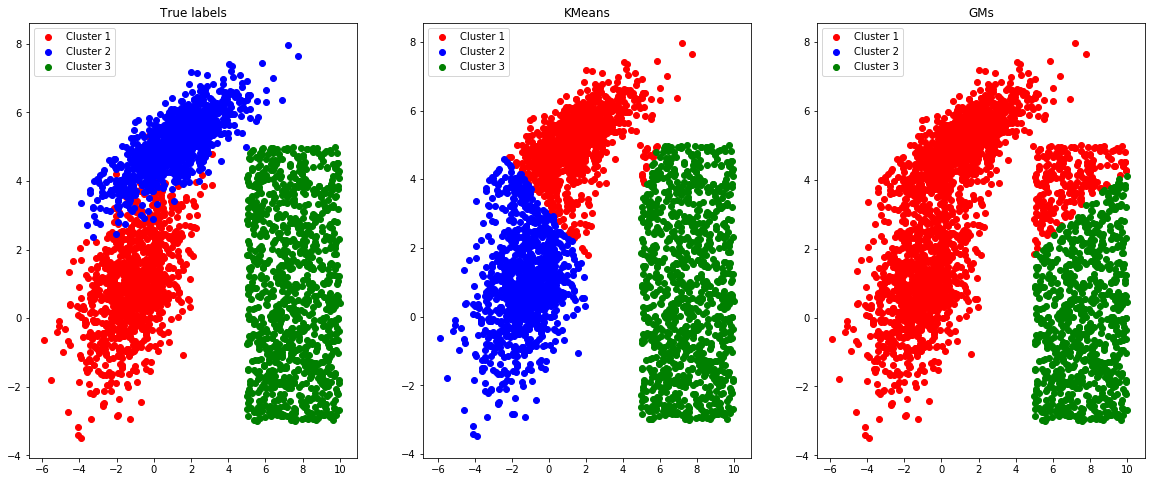

In [88]:
def plot_results(data, y_kmeans, y_gm):
  """Plot the results in one figure"""
  fig, ax = plt.subplots(1, 3)
  fig.set_size_inches(20, 8, forward=True)  
  labels = [data[:, 2], y_kmeans, y_gm]
  title = ["True labels", "KMeans", "GMs"]

  for i in range(len(labels)):
    data_0 = data[labels[i] == 0][:, :2]
    data_1 = data[labels[i] == 1][:, :2]
    data_2 = data[labels[i] == 2][:, :2]
    ax[i].scatter(data_0[:, 0], data_0[:, 1], c='r', label="Cluster 1")
    ax[i].scatter(data_1[:, 0], data_1[:, 1], c='b', label="Cluster 2")
    ax[i].scatter(data_2[:, 0], data_2[:, 1], c='g', label="Cluster 3")
    ax[i].set_title(title[i])
    ax[i].legend()
  
  plt.show()

plot_results(data, y_kmeans, y_gm)

In [89]:
def plot_different_gms(data, threshold, 
                       y_gm, y_gm_proba, 
                       y_gm_kmeans, y_gm_proba_kmeans):
  """ Plots GMs with a random and kmeans initializer"""
  fig, ax = plt.subplots(1, 3)
  fig.set_size_inches(20, 8, forward=True)

  # Create new label ("unknown") for predictions < probability threshold
  y_gm_proba = np.amax(y_gm_proba, axis=1)
  y_gm[y_gm_proba < threshold] = 3
  
  y_gm_proba_kmeans = np.amax(y_gm_proba_kmeans, axis=1)
  y_gm_kmeans[y_gm_proba_kmeans < threshold] = 3

  labels = [data[:, 2], y_gm, y_gm_kmeans]
  title = ["True labels", 
           "GMs with random initializer", 
           "GMs with KMeans as initialization"]
  
  for i in range(len(labels)):
    data_0 = data[labels[i] == 0][:, :2]
    data_1 = data[labels[i] == 1][:, :2]
    data_2 = data[labels[i] == 2][:, :2]
    ax[i].scatter(data_0[:, 0], data_0[:, 1], c='r', label="Cluster 1")
    ax[i].scatter(data_1[:, 0], data_1[:, 1], c='b', label="Cluster 2")
    ax[i].scatter(data_2[:, 0], data_2[:, 1], c='g', label="Cluster 3")
    
    if i != 0:
      # First data are just true labels for comparison
      data_3 = data[labels[i] == 3][:, :2]
      ax[i].scatter(data_3[:, 0], data_3[:, 1], c='black', label="Unknown Cluster")
    
    ax[i].set_title(title[i])
    ax[i].legend()

  plt.show()

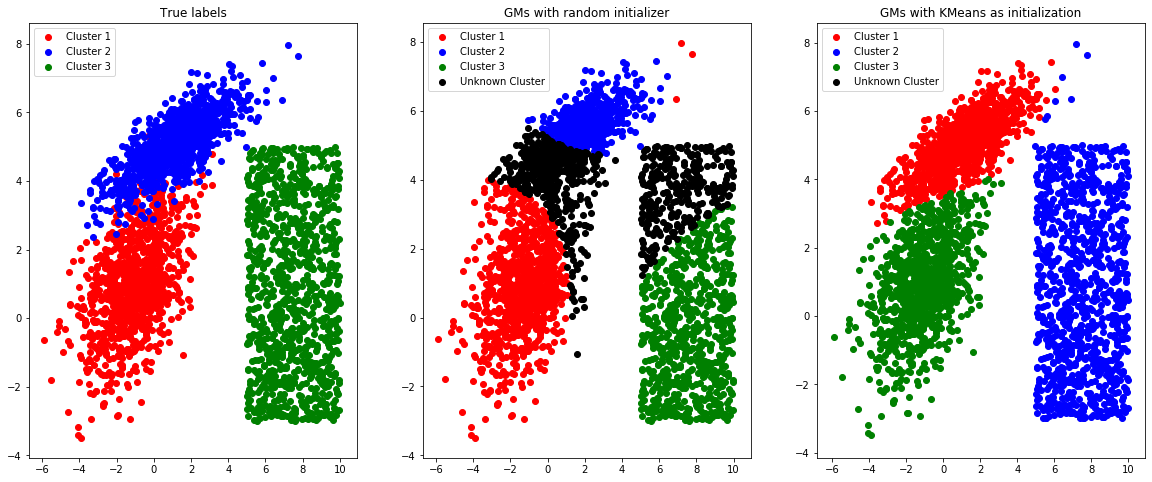

In [90]:
gm = GaussianMixture(n_components=3, 
                     max_iter=1000, 
                     tol=1e-4,
                     init_params='random')
gm_kmeans = GaussianMixture(n_components=3, 
                            max_iter=1000, 
                            tol=1e-4,
                            init_params='kmeans')

y_gm = gm.fit_predict(data[:, :2])
y_gm_proba = gm.predict_proba(data[:, :2])

y_gm_kmeans = gm_kmeans.fit_predict(data[:, :2])
y_gm_proba_kmeans = gm_kmeans.predict_proba(data[:, :2])

plot_different_gms(data, 0.34, 
                   y_gm, y_gm_proba, 
                   y_gm_kmeans, y_gm_proba_kmeans)